<a href="https://colab.research.google.com/github/sneha28032001/TMLC/blob/main/TMLC_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Convolutional Neural Network 

In [2]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.5
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/client/session.py:1768: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


In [3]:
# Convolutional Neural Network

# Importing the libraries
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
import glob 
from natsort import natsorted, ns 
from tqdm.notebook import tqdm 
import numpy as np
from PIL import Image
from sklearn.model_selection import train_test_split

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [14]:
def get_arrays():
  X = []
  Y = []
  cls = []
  datapath = "/content/drive/MyDrive/BarkVN-50_mendeley"
  datapath_list = sorted(os.listdir(datapath))
  i = 0
  for subdir in datapath_list:
    print(subdir)
    cls.append(subdir)
    if i>49: 
      break
    subdir_path = os.path.join(datapath, subdir)
    subdir_path = os.path.join(subdir_path, '*JPG')
    files = glob.glob(subdir_path)
    files = natsorted(files, key = lambda x: x.lower()) 
    for f in tqdm(files):
      np_img = np.asarray(Image.open(f).resize((224,224)))
      #np_img_new = np_img/255
      X.append(np_img)
      Y.append(i) 
    i = i+1
  X = np.asarray(X)
  Y = np.asarray(Y)
  return X, Y,cls

In [6]:
X,Y,cls= get_arrays()

Acacia


  0%|          | 0/102 [00:00<?, ?it/s]

Adenanthera microsperma


  0%|          | 0/80 [00:00<?, ?it/s]

Adenium species


  0%|          | 0/144 [00:00<?, ?it/s]

Anacardium occidentale


  0%|          | 0/239 [00:00<?, ?it/s]

Annona squamosa


  0%|          | 0/105 [00:00<?, ?it/s]

Artocarpus altilis


  0%|          | 0/104 [00:00<?, ?it/s]

Artocarpus heterophyllus


  0%|          | 0/138 [00:00<?, ?it/s]

Barringtonia acutangula


  0%|          | 0/102 [00:00<?, ?it/s]

Cananga odorata


  0%|          | 0/101 [00:00<?, ?it/s]

Carica papaya


  0%|          | 0/207 [00:00<?, ?it/s]

Casuarina equisetifolia


  0%|          | 0/97 [00:00<?, ?it/s]

Cedrus


  0%|          | 0/93 [00:00<?, ?it/s]

Chrysophyllum cainino


  0%|          | 0/121 [00:00<?, ?it/s]

Citrus aurantiifolia


  0%|          | 0/108 [00:00<?, ?it/s]

Citrus grandis


  0%|          | 0/84 [00:00<?, ?it/s]

Cocos nucifera


  0%|          | 0/110 [00:00<?, ?it/s]

Dalbergia oliveri


  0%|          | 0/89 [00:00<?, ?it/s]

Delonix regia


  0%|          | 0/103 [00:00<?, ?it/s]

Dipterocarpus alatus


  0%|          | 0/171 [00:00<?, ?it/s]

Erythrina fusca


  0%|          | 0/104 [00:00<?, ?it/s]

Eucalyptus


  0%|          | 0/127 [00:00<?, ?it/s]

Ficus microcarpa


  0%|          | 0/150 [00:00<?, ?it/s]

Ficus racemosa


  0%|          | 0/117 [00:00<?, ?it/s]

Gmelina arborea Roxb


  0%|          | 0/103 [00:00<?, ?it/s]

Hevea brasiliensis


  0%|          | 0/110 [00:00<?, ?it/s]

Hopea


  0%|          | 0/91 [00:00<?, ?it/s]

Khaya senegalensis


  0%|          | 0/95 [00:00<?, ?it/s]

Khaya senegalensis A.Juss


  0%|          | 0/99 [00:00<?, ?it/s]

Lagerstroemia speciosa


  0%|          | 0/96 [00:00<?, ?it/s]

Magnolia alba


  0%|          | 0/92 [00:00<?, ?it/s]

Mangifera


  0%|          | 0/92 [00:00<?, ?it/s]

Melaleuca


  0%|          | 0/107 [00:00<?, ?it/s]

Melia azedarach


  0%|          | 0/103 [00:00<?, ?it/s]

Musa


  0%|          | 0/132 [00:00<?, ?it/s]

Nephelium lappaceum


  0%|          | 0/104 [00:00<?, ?it/s]

Persea


  0%|          | 0/103 [00:00<?, ?it/s]

Polyalthia longifolia


  0%|          | 0/100 [00:00<?, ?it/s]

Prunnus


  0%|          | 0/80 [00:00<?, ?it/s]

Prunus salicina


  0%|          | 0/105 [00:00<?, ?it/s]

Psidium guajava


  0%|          | 0/122 [00:00<?, ?it/s]

Pterocarpus macrocarpus


  0%|          | 0/100 [00:00<?, ?it/s]

Senna siamea


  0%|          | 0/93 [00:00<?, ?it/s]

Spondias mombin L


  0%|          | 0/102 [00:00<?, ?it/s]

Syzygium nervosum


  0%|          | 0/109 [00:00<?, ?it/s]

Tamarindus indica


  0%|          | 0/103 [00:00<?, ?it/s]

Tectona grandis


  0%|          | 0/102 [00:00<?, ?it/s]

Terminalia catappa


  0%|          | 0/113 [00:00<?, ?it/s]

Veitchia merrilli


  0%|          | 0/152 [00:00<?, ?it/s]

Wrightia


  0%|          | 0/97 [00:00<?, ?it/s]

Wrightia religiosa


  0%|          | 0/100 [00:00<?, ?it/s]

In [7]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1)

In [8]:
print(X_train.shape) # To check shape of input data for the model
print(Y_train.shape)

(5040, 224, 224, 3)
(5040,)


In [9]:
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Dense

In [10]:
from tensorflow.keras.regularizers import l2

In [11]:
# Part 2 - Building the CNN
# Initialising the CNN
cnn = tf.keras.models.Sequential()

# Step 1 - Convolution
cnn.add(tf.keras.layers.Conv2D(filters=32,padding="same",kernel_size=3, activation='relu', strides=2, input_shape=[224, 224, 3]))

# Step 2 - Pooling
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

# Adding a second convolutional layer
cnn.add(tf.keras.layers.Conv2D(filters=32,padding='same',kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

# Step 3 - Flattening
cnn.add(tf.keras.layers.Flatten())

# Step 4 - Full Connection
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))

# Step 5 - Output Layer
#cnn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))
## for mulitclassification
cnn.add(Dense(50, kernel_regularizer=tf.keras.regularizers.l2(0.01),activation
             ='softmax'))
cnn.compile(optimizer = 'adam', loss = 'squared_hinge', metrics = ['accuracy'])

In [12]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 112, 112, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 56, 56, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 56, 56, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 28, 28, 32)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 25088)             0         
                                                                 
 dense (Dense)               (None, 128)               3

In [13]:
# Part 3 - Training the CNN

# Compiling the CNN
cnn.compile(loss = tf.keras.losses.sparse_categorical_crossentropy, 
   optimizer = tf.keras.optimizers.Adam(), metrics = ['accuracy'])

# Training the CNN on the Training set and evaluating it on the Test set
history = cnn.fit(X_train, Y_train, epochs =30, shuffle = True,
                    validation_split=0.10, use_multiprocessing = True)

Epoch 1/30
142/142 [==============================] - 43s 299ms/step - loss: 30.0412 - accuracy: 0.1281 - val_loss: 3.4822 - val_accuracy: 0.2282
Epoch 2/30
142/142 [==============================] - 42s 298ms/step - loss: 2.5708 - accuracy: 0.4491 - val_loss: 3.1008 - val_accuracy: 0.3552
Epoch 3/30
142/142 [==============================] - 44s 309ms/step - loss: 1.3852 - accuracy: 0.7427 - val_loss: 3.2677 - val_accuracy: 0.4048
Epoch 4/30
142/142 [==============================] - 42s 297ms/step - loss: 0.8996 - accuracy: 0.8673 - val_loss: 4.2277 - val_accuracy: 0.3988
Epoch 5/30
142/142 [==============================] - 42s 298ms/step - loss: 0.6007 - accuracy: 0.9557 - val_loss: 4.2308 - val_accuracy: 0.3611
Epoch 6/30
142/142 [==============================] - 42s 298ms/step - loss: 0.4929 - accuracy: 0.9764 - val_loss: 4.2973 - val_accuracy: 0.3889
Epoch 7/30
142/142 [==============================] - 42s 298ms/step - loss: 0.4209 - accuracy: 0.9921 - val_loss: 4.4351 - val_a

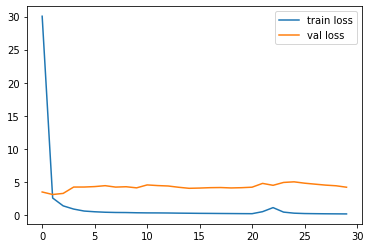

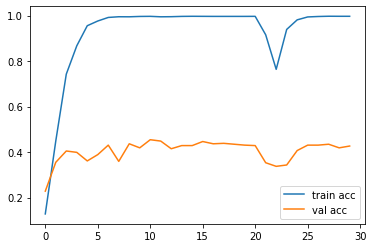

<Figure size 432x288 with 0 Axes>

In [15]:
# plot the loss
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [16]:
# save it as a h5 file


from tensorflow.keras.models import load_model

cnn.save('model_img_class.h5')

In [18]:
from tensorflow.keras.models import load_model
 
# load model
model = load_model('model_img_class.h5')

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 112, 112, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 56, 56, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 56, 56, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 28, 28, 32)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 25088)             0         
                                                                 
 dense (Dense)               (None, 128)               3

In [28]:
from sklearn import metrics 
from sklearn.metrics import classification_report


In [31]:
loss, acc = model.evaluate(X_test,  Y_test, verbose=2)
Y_pred = np.array(tf.math.argmax(model.predict(X_test), 1))
cm = tf.math.confusion_matrix(Y_test, Y_pred)


acc = metrics.accuracy_score(Y_test, Y_pred)
print("accuracy of test =", acc*100,"%\n")

print(classification_report(Y_test, Y_pred))


18/18 - 1s - loss: 4.6166 - accuracy: 0.4242 - 1s/epoch - 79ms/step
accuracy of test = 42.42424242424242 %

              precision    recall  f1-score   support

           0       0.33      0.17      0.22         6
           1       0.00      0.00      0.00         2
           2       0.80      0.62      0.70        13
           3       0.86      0.79      0.83        24
           4       0.67      0.44      0.53        18
           5       0.64      1.00      0.78         9
           6       0.50      0.83      0.62        12
           7       0.79      0.73      0.76        15
           8       0.14      0.18      0.16        11
           9       0.86      0.86      0.86        21
          10       0.14      0.10      0.12        10
          11       0.09      0.14      0.11         7
          12       0.62      0.89      0.73         9
          13       0.57      0.27      0.36        15
          14       0.50      0.43      0.46         7
          15       0.33    